In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn

## data preprocessing

In [2]:
cd ..

C:\Users\kesav\OneDrive\Desktop\AI\dl\Long-term-traffic-flow-forecasting-using-a-hybrid-CNN-BiLSTM-model


In [3]:
df=pd.read_csv("Datasets/AS2(t-12).csv")
data=df["clave"]
df.drop(columns=["clave"],axis=1,inplace=True)
df['hour(t)']=list(np.arange(13,24))+list(np.arange(0,24))*1307
df=df.reindex(columns=['var1(t-12)','var2(t-12)','var3(t-12)','var4(t-12)','var5(t-12)','var6(t-12)','var7(t-12)','var8(t-12)','hour(t)','obj'])

print(df)
print(data)

       var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var6(t-12)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31374         261       260.0       114.0       218.0         0.0       170.0   
31375         395       420.0       170.0       218.0         0.0       170.0   
31376         459       590.0       228.0       218.0         0.0       170.0   
31377         631       696.0       305.0       218.0         0.0       170.0   
31378         743       852.0       353.0       218.0         0.0       170.0   

       var7(t-12) var8(t-12

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['var8(t-12)']=le.fit_transform(df['var8(t-12)'])
# le.transform(df['var8(t-12)'])
print(df)

       var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var6(t-12)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31374         261       260.0       114.0       218.0         0.0       170.0   
31375         395       420.0       170.0       218.0         0.0       170.0   
31376         459       590.0       228.0       218.0         0.0       170.0   
31377         631       696.0       305.0       218.0         0.0       170.0   
31378         743       852.0       353.0       218.0         0.0       170.0   

       var7(t-12)  var8(t-1

In [5]:
def slicing_data(data,rows):
    x=list()
    y=list()
    for i in np.arange(rows-1,len(data)):
        y.append(data.iloc[i][-1])
        x.append([data.iloc[i-3][:-1],data.iloc[i-2][:-1],data.iloc[i-1][:-1],data.iloc[i][:-1]])
    
    return np.array(x).astype('float32'),np.array(y).astype('float32')


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split


In [7]:

scaler=MinMaxScaler()
df[df.columns.difference(['obj'])]=scaler.fit_transform(df[df.columns.difference(['obj'])])

In [8]:
x,y=slicing_data(df,4)
print(x)
print(y)

[[[0.08009199 0.33433804 0.22783934 ... 0.27970296 0.33333334 0.5652174 ]
  [0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]]

 [[0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]]

 [[0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]
  [0.05339466 0.0839323  0.04466759 ... 0.27970296 0.33333334 0.7826087 ]]

 ...

 [[0.02489751 0.03825643 0.02285319 ... 0.64851487 1.         0.7826087 ]
  [0.02629737 0.06028287 0

In [9]:
print(x[0].shape)
print(y.shape)

(4, 9)
(31376,)


In [10]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.333,random_state=101)

In [11]:
 y_test.shape

(10449,)

# model training

In [12]:
import tensorflow.keras.layers as layers

In [13]:
input_layer=layers.Input(shape=(4,9,1))
layer_1=layers.TimeDistributed(layers.Conv1D(filters=512,kernel_size=2,activation="relu"))(input_layer)
layer_2=layers.TimeDistributed(layers.MaxPool1D(pool_size=2, padding='same'))(layer_1)
layer_3=layers.TimeDistributed(layers.Flatten())(layer_2)
layer_4=layers.Dropout(0.5)(layer_3)
layer_5=layers.LSTM(512, activation = 'relu')(layer_4)
layer_6=layers.BatchNormalization()(layer_5)
output_layer=layers.Dense(1)(layer_6)
model_1=tf.keras.Model(inputs=input_layer,outputs=output_layer)


In [14]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 9, 1)]         0         
                                                                 
 time_distributed (TimeDist  (None, 4, 8, 512)         1536      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 4, 4, 512)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 4, 2048)           0         
 stributed)                                                      
                                                                 
 dropout (Dropout)           (None, 4, 2048)           0         
                                                             

In [15]:
model_1.compile(optimizer='adam',loss='mse',metrics=[tf.keras.metrics.MeanAbsoluteError()])
history_1=model_1.fit(X_train,y_train,epochs=100,batch_size = 32, shuffle=True,validation_data=(X_test,y_test))

Epoch 1/100
654/654 [==============================] - 115s 171ms/step - loss: 184262.5938 - mean_absolute_error: 343.2290 - val_loss: 61838.5664 - val_mean_absolute_error: 186.8201
Epoch 2/100
654/654 [==============================] - 113s 172ms/step - loss: 47654.7695 - mean_absolute_error: 157.1086 - val_loss: 40094.3750 - val_mean_absolute_error: 151.3645
Epoch 3/100
654/654 [==============================] - 108s 166ms/step - loss: 38220.9375 - mean_absolute_error: 137.1558 - val_loss: 28078.9199 - val_mean_absolute_error: 116.8944
Epoch 4/100
654/654 [==============================] - 107s 164ms/step - loss: 35545.9023 - mean_absolute_error: 131.5017 - val_loss: 27081.5430 - val_mean_absolute_error: 112.8785
Epoch 5/100
654/654 [==============================] - 111s 169ms/step - loss: 34513.1641 - mean_absolute_error: 128.8560 - val_loss: 25499.4863 - val_mean_absolute_error: 102.9771
Epoch 6/100
654/654 [==============================] - 107s 163ms/step - loss: 32819.3633 - me

# model evaluation

In [16]:
model_1.save('model_12.h5')

C:\Users\kesav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
from tensorflow.keras.models import load_model

In [18]:
savedModel=load_model('model_12.h5')
savedModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 9, 1)]         0         
                                                                 
 time_distributed (TimeDist  (None, 4, 8, 512)         1536      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 4, 4, 512)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 4, 2048)           0         
 stributed)                                                      
                                                                 
 dropout (Dropout)           (None, 4, 2048)           0         
                                                             

In [19]:
pred=savedModel.predict(X_test)
pred

327/327 [==============================] - 10s 29ms/step


array([[127.64696 ],
       [124.493416],
       [314.62335 ],
       ...,
       [260.04495 ],
       [332.70694 ],
       [829.7945  ]], dtype=float32)

In [20]:
pred=pred.reshape(pred.shape[0])
y_test=y_test.reshape(y_test.shape[0])

In [21]:
MAE = sklearn.metrics.mean_absolute_error(pred,y_test)
print(MAE)

94.68983


In [22]:
import random

In [23]:

rand=random.randint(0,30000)
rand

8519

In [24]:
y1=y[rand:rand+500]
x1=savedModel.predict(x[rand:rand+500])


16/16 [==============================] - 0s 28ms/step


In [25]:
x1=x1.reshape(x1.shape[0])
x1

array([ 466.25565 ,  492.26468 ,  544.32764 ,  568.1597  ,  556.51227 ,
        478.37595 ,  359.3906  ,  308.67157 ,  246.05338 ,  132.2327  ,
        106.75414 ,  128.61993 ,  118.86438 ,  119.26817 ,  119.13454 ,
        118.07543 ,  150.41158 ,  253.18689 ,  342.18997 ,  447.8989  ,
        474.37805 ,  626.1397  ,  555.0033  ,  400.70908 ,  376.80862 ,
        433.32684 ,  453.22202 ,  463.8467  ,  426.7977  ,  345.06827 ,
        263.52765 ,  200.80804 ,  140.05978 ,  101.98984 ,   83.98099 ,
         89.344246,  154.55792 ,  169.59319 ,  216.42184 ,  516.7298  ,
       1014.4632  ,  741.9101  ,  667.79083 ,  681.12787 ,  689.33124 ,
        718.5805  ,  677.5373  ,  724.63226 ,  779.4738  ,  859.02905 ,
        872.14557 ,  824.88104 ,  624.2365  ,  483.04715 ,  347.04816 ,
        247.61304 ,  194.88074 ,  115.07989 ,  136.85516 ,   97.046524,
        134.98808 ,  166.45346 ,  210.67337 ,  516.47797 ,  692.6741  ,
        571.6086  ,  551.6224  ,  459.53577 ,  655.72723 ,  619.

In [26]:
import matplotlib.pylab as plt

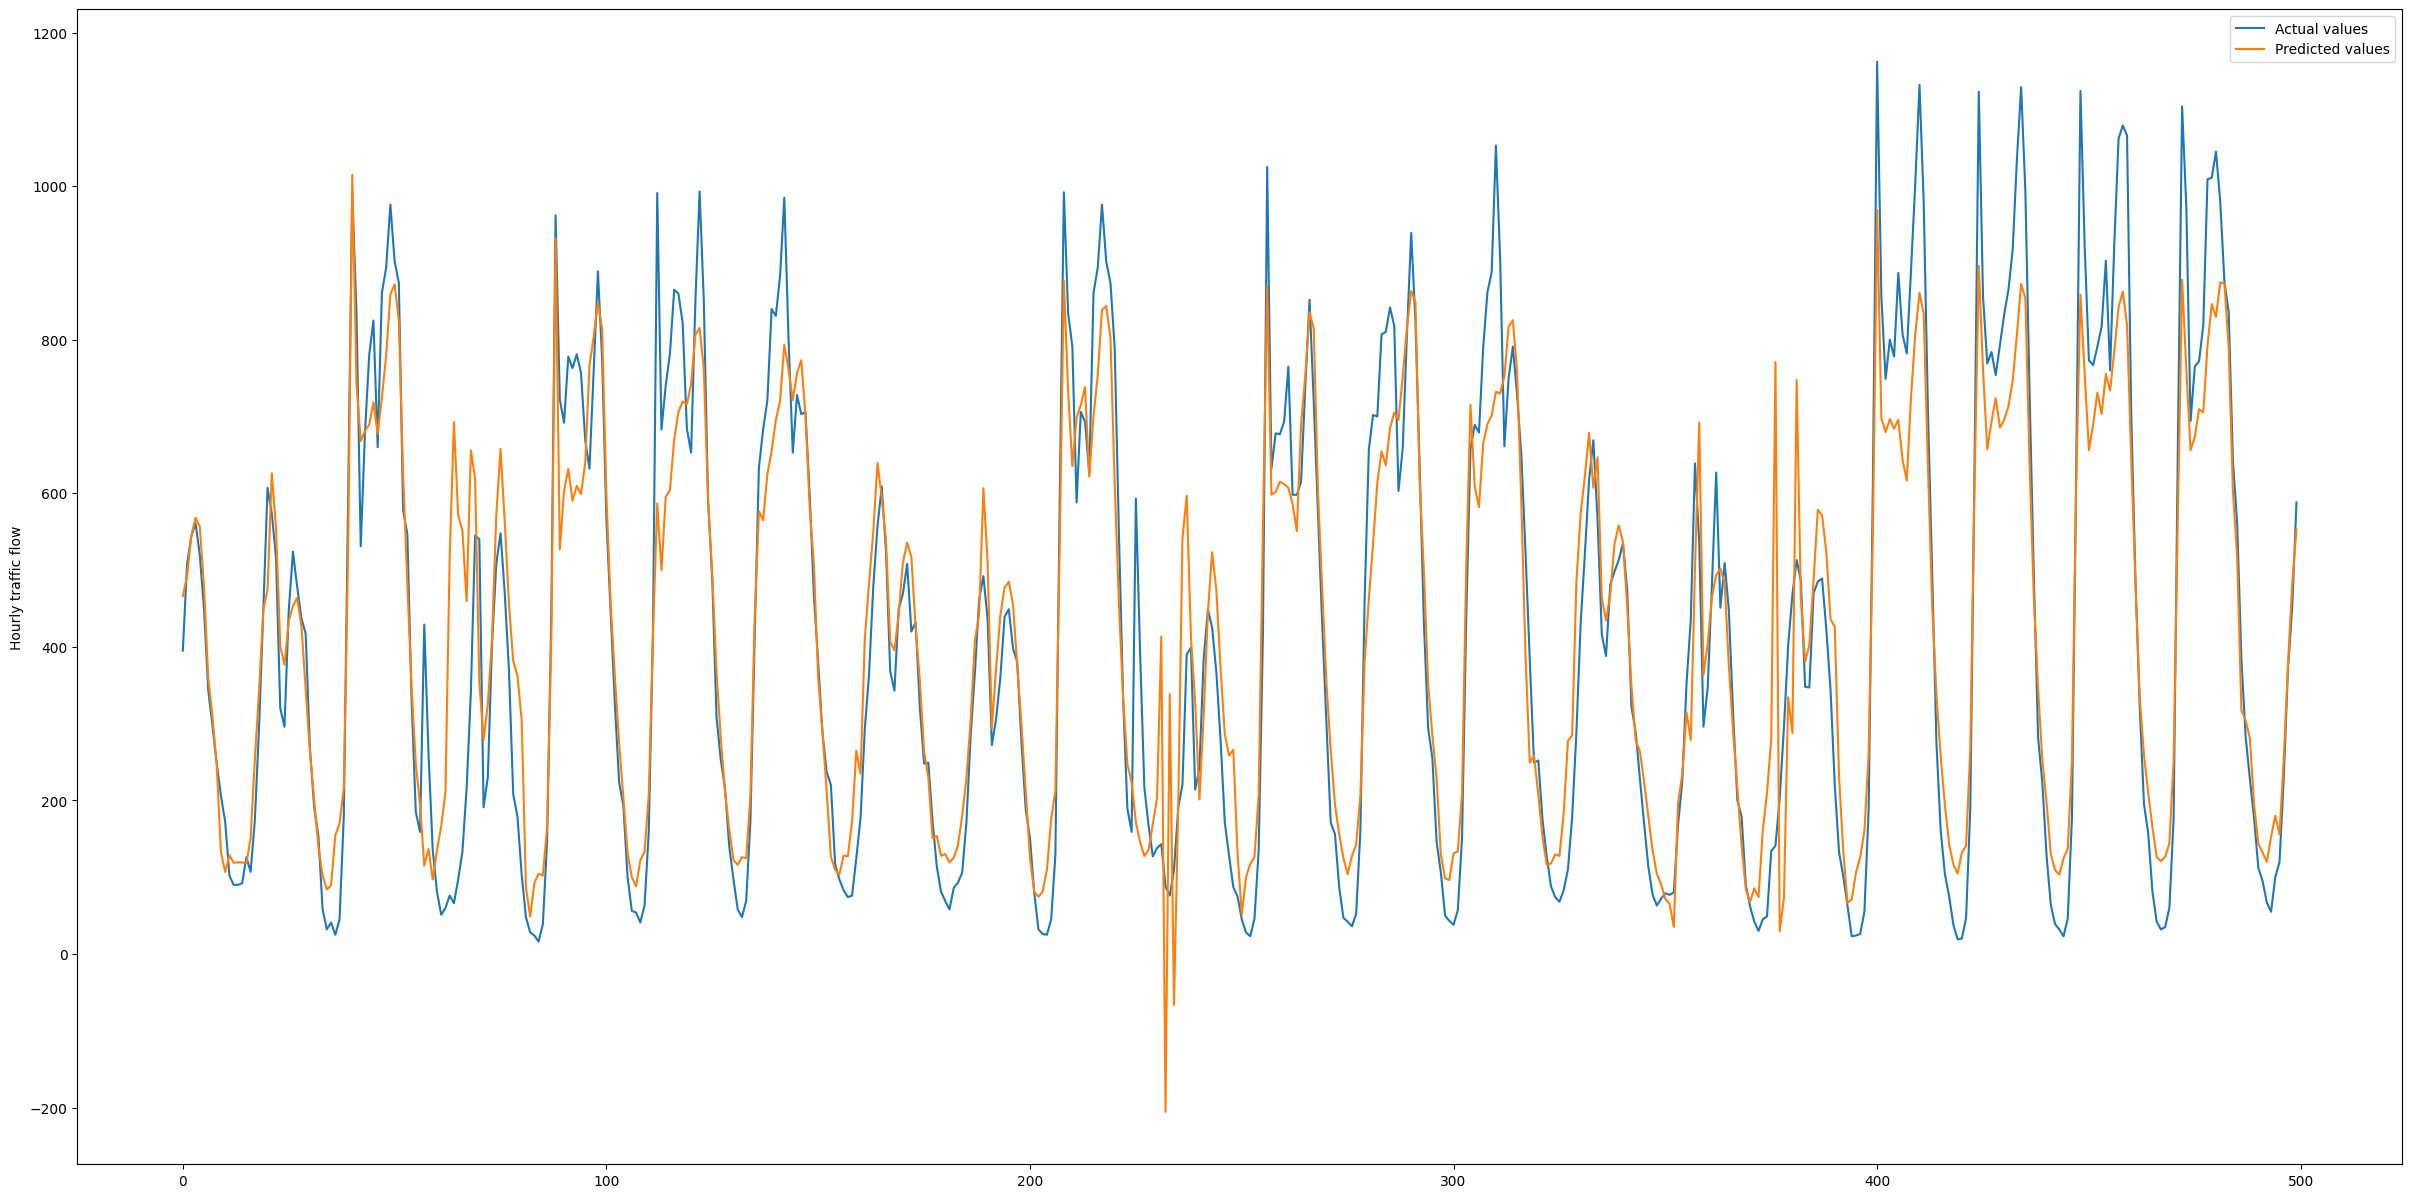

In [27]:
plt.figure(figsize=(30, 15))
plt.plot(y1, label = "Actual values")
plt.plot(x1, label = "Predicted values")
plt.legend()
plt.ylabel('Hourly traffic flow')
plt.show()